<h1>Collecting Job Data Using APIs</h1>

<hr>

<h2>Lab: Collect Jobs Data using Jobs API</h2>
<p><b>Objetivo</b>: Determinar la cantidad de puestos vacantes actualmente para diversas tecnologías y para varias ubicaciones
Recopilar la cantidad de ofertas de trabajo para las siguientes ubicaciones mediante la API:</p>
<ul>
<li>Los Ángeles</li>
<li>Nueva York</li>
<li>San Francisco</li>
<li>Washington DC</li>
<li>Seattle</li>
<li>Austin</li>
<li>Detroit</li>
</ul>

In [1]:
#importando librerias
import pandas as pd
import json
import requests

<p>Escriba una función para obtener la cantidad de trabajos para la tecnología Python.</p>
<b>Nota:</b> mientras utiliza el laboratorio, debe pasar la información de carga útil para el atributo <code>params</code> en forma de pares clave-valor. Consulte el laboratorio de API de descanso sin calificación en el enlace del curso Python para ciencia de datos, inteligencia artificial y desarrollo</p>

<p>Las claves en el json son:</p>
<ul>
<li>Job title</li>
<li>Job Experience Required</li>
<li>Key Skills</li>
<li>Role Category</li>
<li>Location</li>
<li>Functional Area</li>
<li>Industry</li>
<li>Role</li>
</ul>

<p>También puede ver el contenido del archivo json desde la siguiente URL de json.</p>

In [2]:
api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"

resp = requests.get(api_url)

if resp.ok:
    data=resp.json()

In [3]:
def get_number_of_jobs(technology):
    number_of_jobs = 0
    #your code goes here
    for tech in technology:
        number_of_jobs = number_of_jobs + 1
    return technology,number_of_jobs

In [4]:
print(get_number_of_jobs('python'))

('python', 6)


In [5]:
#función para encontrar la cantidad de empleos en EE. UU. para una ubicación de su elección
def get_number_of_jobs_L(location):
    payload={"Location": location}
    response=requests.get(api_url, params=payload)
    if response.ok:
        data=response.json()
        number_of_jobs = len(data)
    return location,number_of_jobs

In [6]:
# Llame a la función de Los Ángeles y verifique si está funcionando.
get_number_of_jobs_L('Los Angeles')

('Los Angeles', 2)

<b>Almacene los resultados en un archivo de Excel</b>

<ul>
<li>Llame a la API para todas las tecnologías mencionadas anteriormente y escriba los resultados en una hoja de cálculo de Excel.</li>
<li>Cree una lista de Python de todas las tecnologías para las que necesita encontrar la cantidad de ofertas de trabajo</li>
</ul>

In [7]:
# Importar bibliotecas necesarias para crear una hoja de cálculo de Excel
from openpyxl import Workbook

In [8]:
# Cree un libro de trabajo y seleccione la hoja de trabajo activa
wb=Workbook()
ws=wb.active

Busque la cantidad de ofertas de empleo para cada una de las tecnologías de la lista anterior. Escriba el nombre de la tecnología y la cantidad de ofertas de empleo en la hoja de cálculo de Excel.

In [9]:
#lista de pytthon con locacions
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

In [10]:
# Guárdelo en una hoja de cálculo de Excel llamada 'github-job-postings.xlsx'
def get_number_of_jobs_P(locations):
    number_of_jobs_list = []
    for location in locations:
        payload={"Location":location}
        response=requests.get(api_url, params=payload)
        if response.ok:
            data=response.json()
            number_of_jobs = len(data)
            number_of_jobs_list.append({location: number_of_jobs})

    return number_of_jobs_list

get_number_of_jobs_P(locations)

[{'Los Angeles': 2},
 {'New York': 2},
 {'San Francisco': 2},
 {'Washington DC': 2},
 {'Seattle': 2},
 {'Austin': 2},
 {'Detroit': 2}]

In [11]:
# guardando en una hoja de excel llamada 'job-postings.xlsx'
wb.save("job-postings.xlsx")

<p>De manera similar, puede probar las tecnologías que se indican a continuación y los resultados se pueden almacenar en una hoja de Excel. Recopile la cantidad de ofertas de trabajo para los siguientes idiomas mediante la API:</p>

<ul>
<li>C</li>
<li>C#</li>
<li>C++</li>
<li>Java</li>
<li>JavaScript</li>
<li>Python</li>
<li>Scala</li>
<li>Oracle</li>
<li>SQL Server</li>
<li>MySQL Server</li>
<li>PostgreSQL</li>
<li>MongoDB</li>
</ul>

In [12]:
#your code goes here
Jobs = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']

In [13]:
#your code goes here
for num in Jobs:
    print(get_number_of_jobs(num))
    ws.append(get_number_of_jobs(num))

('C', 1)
('C#', 2)
('C++', 3)
('Java', 4)
('JavaScript', 10)
('Python', 6)
('Scala', 5)
('Oracle', 6)
('SQL Server', 10)
('MySQL Server', 12)
('PostgreSQL', 10)
('MongoDB', 7)


In [21]:
# your code goes here
!pip install openpyxl
from openpyxl import Workbook

In [22]:
# your code goes here
wb=Workbook()
ws=wb.active

Find the number of jobs postings for each of the technology in the above list. Write the technology name and the number of jobs postings into the excel spreadsheet.

In [23]:
#your code goes here
for num in Jobs:
    print(get_number_of_jobs(num))
    ws.append(get_number_of_jobs(num))

('C', 1)
('C#', 2)
('C++', 3)
('Java', 4)
('JavaScript', 10)
('Python', 6)
('Scala', 5)
('Oracle', 6)
('SQL Server', 10)
('MySQL Server', 12)
('PostgreSQL', 10)
('MongoDB', 7)


In [24]:
# Save into an excel spreadsheet named 'github-job-postings.xlsx'.
#your code goes here
wb.save('github-job-posting.xlsx')
import pandas as pd

df = pd.read_excel ('github-job-posting.xlsx')
print (df)


               C   1
0             C#   2
1            C++   3
2           Java   4
3     JavaScript  10
4         Python   6
5          Scala   5
6         Oracle   6
7     SQL Server  10
8   MySQL Server  12
9     PostgreSQL  10
10       MongoDB   7


In [28]:
#agregando encabezadps
headers= ["Lenguaje", "Conteo"]
df.columns = headers

In [49]:
#ordenando valores
df = df.sort_values(by="Conteo")

<h3>Graficando los datos</h3>

In [16]:
# importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# creando colores
paleta_colores = sns.color_palette("husl", len(df))

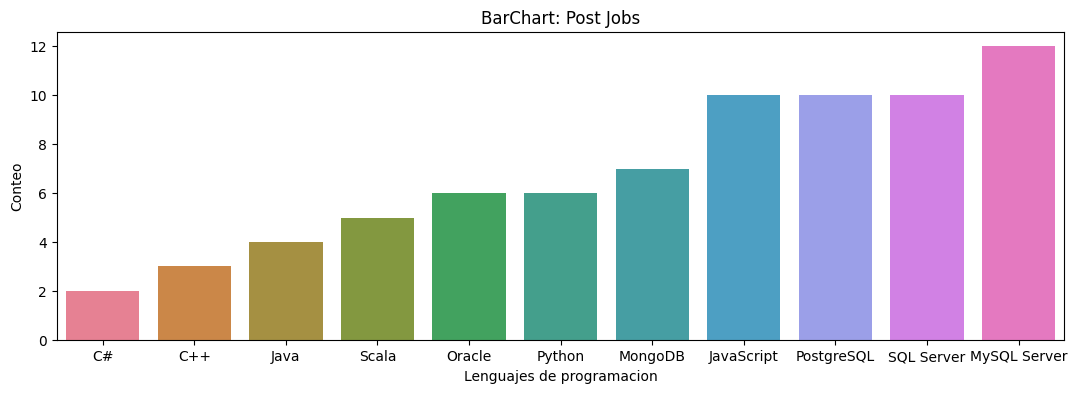

In [57]:
# graficando
plt.figure(figsize=(13,4))
sns.barplot(x='Lenguaje', y='Conteo', data=df, hue="Lenguaje")
# Etiquetas y título (opcional)
plt.xlabel('Lenguajes de programacion')
plt.ylabel('Conteo')
plt.title('BarChart: Post Jobs')
plt.show()